In [14]:
#import packages
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.datasets import load_diabetes
import warnings
warnings.filterwarnings('ignore') # This is a comment




In [72]:
boston= pd.read_csv('HousingData.csv')


In [84]:
boston = boston.dropna()

In [120]:
X = boston.iloc[:,:-1]
y = boston.iloc[:,-1]

In [122]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21


In [124]:
y[1:10]

1     21.6
2     34.7
3     33.4
5     28.7
7     27.1
8     16.5
10    15.0
11    18.9
12    21.7
Name: MEDV, dtype: float64

In [92]:
#split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [137]:
#create gradient boost regressor object
gradientregressor = GradientBoostingRegressor(max_depth = 2, n_estimators = 150, learning_rate = 0.1)

In [139]:
#train gradient boost regressor
model = gradientregressor.fit(X_train,y_train)

In [141]:
#predict the response for test
y_pred = model.predict(X_test)

In [143]:
r2_score(y_pred,y_test)

0.8669772173775903

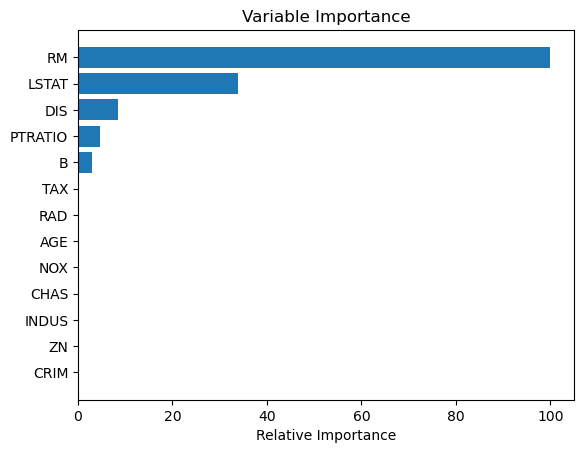

In [116]:
import matplotlib.pyplot as plt
%matplotlib inline

#plot feature importance
feature_importance = model.feature_importances_

#make importances relative to importance mas
feature_importance = 100.0*(feature_importance/feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos,feature_importance[sorted_idx],align='center')
plt.yticks(pos,X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [135]:
#Tuning the hyperparameters
from sklearn.model_selection import GridSearchCV
LR ={'learning_rate':[0.15,0.1,0.10,0.05],'n_estimators':[100,150,200,250]}
tuning = GridSearchCV(estimator = GradientBoostingRegressor(),param_grid = LR,scoring = 'r2')
tuning.fit(X_train,y_train)
tuning.best_params_ , tuning.best_score_

({'learning_rate': 0.1, 'n_estimators': 150}, 0.8682125945251252)